## Bitcoin Price Prediction Models

Our goal in this project is to attempt to predict bitcoin prices using historical data.
We will use several regression models to predict prices using data on bitcoin supply and demand. Patterns detected will be used to inform our price prediction model. A dataset. spanning from 2010-2017 will be used. Data from the eight years will provide enough data to identify and access patterns. Testing will be done by comparing the accuracy of the predicted on the different models. 
Applied Models:
Random Forest
Linear Regression Model
Support Vector Machine Model
XGB Regressor Model

The Mean Absolute Error value will be used to assess our models. The lower the MAE value, the closer it is to the predicted price.


In [127]:
import pandas as pd
import os
df = pd.read_csv("bitcoin_dataset.csv", parse_dates=['Date'])
df.shape
df.head

<bound method NDFrame.head of            Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0    2010-02-23          0.000000           2110700.0    0.000000e+00   
1    2010-02-24          0.000000           2120200.0    0.000000e+00   
2    2010-02-25          0.000000           2127600.0    0.000000e+00   
3    2010-02-26          0.000000           2136100.0    0.000000e+00   
4    2010-02-27          0.000000           2144750.0    0.000000e+00   
...         ...               ...                 ...             ...   
2915 2018-02-16      10127.161667          16869150.0    1.708366e+11   
2916 2018-02-17      10841.991667          16871012.5    1.829154e+11   
2917 2018-02-18      10503.298333          16873037.5    1.772225e+11   
2918 2018-02-19      11110.965000          16875062.5    1.874982e+11   
2919 2018-02-20      11390.391667          16876825.0    1.922336e+11   

      btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0         0.000000e+00        

# Factors affecting bitcoin price

1.Number of available bitcoins.

2.Difficulty to find new bitcoin.

3.Number of unique bitcoin addresses.

4.Value of bitcoin rewards.

## We now want a new column with net rewards(revenue - transaction fees) to get a more accurate sense of the value of bitcoin rewards.

In [128]:
df['btc_rewards'] = df['btc_miners_revenue'] - df['btc_transaction_fees']


## Next we get the min,max and average of the factors we are interested in as well as their percentiles.

In [129]:
interest = ["btc_market_price","btc_total_bitcoins", "btc_difficulty", "btc_rewards", "btc_transaction_fees", "btc_n_unique_addresses"]
df2 = df[interest]
df2.describe()

,btc_market_price,btc_total_bitcoins,btc_difficulty,btc_rewards,btc_transaction_fees,btc_n_unique_addresses
count,2920.000000,2.920000e+03,2.920000e+03,2.920000e+03,2920.000000,2.920000e+03
mean,897.485562,1.152051e+07,1.808140e+11,2.298055e+06,60.907496,1.959608e+05
std,2400.159935,4.200938e+06,4.305425e+11,5.809928e+06,117.430753,2.093837e+05
min,0.000000,2.110700e+06,2.527738e+00,-9.350000e+00,0.000000,1.100000e+02
25%,6.768750,8.405100e+06,1.617684e+06,4.767330e+04,9.723592,1.719000e+04
50%,236.310000,1.242910e+07,3.129573e+09,8.895322e+05,21.119445,1.325365e+05
75%,603.909050,1.523764e+07,1.584272e+11,1.865003e+06,50.778836,3.666370e+05
max,19498.683333,1.687682e+07,2.967853e+12,5.319105e+07,1495.946477,1.072861e+06


## Models

First assign X and Y variables.

X will be factors affecting price y.

In [130]:
models = pd.DataFrame(columns=["Model","MAE","MSE","R2 Score"])

In [131]:
features = ["btc_total_bitcoins", "btc_difficulty", "btc_rewards", "btc_transaction_fees", "btc_n_unique_addresses"]
X = df2[features]
y = df2['btc_market_price']

## Split into training and testing sets.

In [132]:
from sklearn.model_selection import train_test_split,cross_val_score
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

## Evaluation Functions

In [133]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r_squared = r2_score(y, predictions)
    return mae, mse, r_squared

## Predicting using Random Forest model

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
predictions = rf_model.predict(val_X)


mae, mse,  r_squared = evaluation(val_y, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r_squared)
print("-"*30)


new_row = {"Model": "Random Forest","MAE": mae, "MSE": mse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 40.797884255605254
MSE: 27123.629462211407
R2 Score: 0.9948207107012088
------------------------------


## Predicting using Linear Regression model

In [135]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()  
linear.fit(train_X, train_y)
predictions = linear.predict(val_X)


mae, mse, r_squared = evaluation(val_y, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r_squared)
print("-"*30)


new_row = {"Model": "Linear Regression","MAE": mae, "MSE": mse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)


MAE: 102.78371294326315
MSE: 42175.75538455256
R2 Score: 0.9919464893577028
------------------------------


## Predicting using  Support Vector Machine model

In [136]:
from sklearn.svm import SVR

svr = SVR(C=100000)
svr.fit(train_X, train_y)
predictions = svr.predict(val_X)


mae, mse, r_squared = evaluation(val_y, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r_squared)
print("-"*30)


new_row = {"Model": "Support Vector Machine","MAE": mae, "MSE": mse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)



MAE: 212.8991301382798
MSE: 319859.50610158005
R2 Score: 0.9389224469617324
------------------------------


## Predicting using  XGB Regressor model

In [137]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(train_X, train_y)
predictions= xgb.predict(val_X)

mae, mse, r_squared = evaluation(val_y, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r_squared)
print("-"*30)


new_row = {"Model": "XGB Regression","MAE": mae, "MSE": mse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)


MAE: 41.375879364631096
MSE: 24968.40773365259
R2 Score: 0.995232252853073
------------------------------


## Comparing Models

In [138]:
models = models.drop_duplicates()
models.sort_values(by="MAE")


# print(models.unique())
# from IPython.display import clear_output
# clear_output(wait=True)
# models.unique()

,Model,MAE,MSE,R2 Score
0,Random Forest,40.797884,27123.629462,0.994821
3,XGB Regression,41.375879,24968.407734,0.995232
1,Linear Regression,102.783713,42175.755385,0.991946
2,Support Vector Machine,212.899130,319859.506102,0.938922


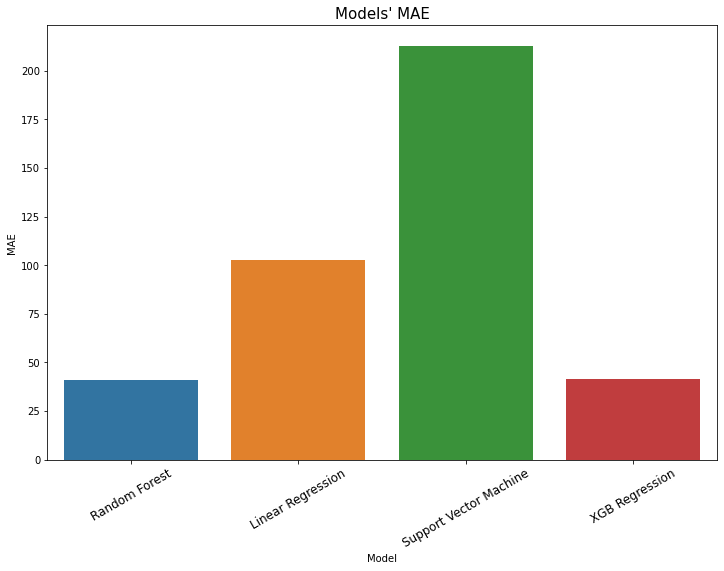

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["MAE"])
plt.title("Models' MAE", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

## Conclusion
Our best price prediction model is the Random Forest Model, which is off by roughly $40(MAE of 40.7978).

The XGB model is a close second, which is off by roughly $41 (MAE of MAE: 41.37587).

I attempted to improve the random forest model by using variables and tuning hyperparameters, but this version produced the best results.

A refined model with better-predicted values would impact the cryptocurrency world.
The same model might be replicated in other industries, especially finance, and cause a ripple effect.

My suggestion to future developers would be to improve this random forest model or combine it with others of similar efficiency, like the XGB model, to form an ensemble model.

Industry experts implement an LSTM mode, an artificial recurrent neural network, to mitigate time series prediction problems like these.

Another suggestion would be implementing the autoregressive integrated moving average(ARIMA) model.




